In [1]:
%reload_ext autoreload
%autoreload 2

from cleaner_rotcurves import *
import matplotlib.pyplot as plt
import scipy

In [2]:
Rotcurves[13].data.head()

,R,Vc
0,0.00,0.00
1,0.09,51.23
2,0.19,65.00
3,0.30,70.81
4,0.42,74.14


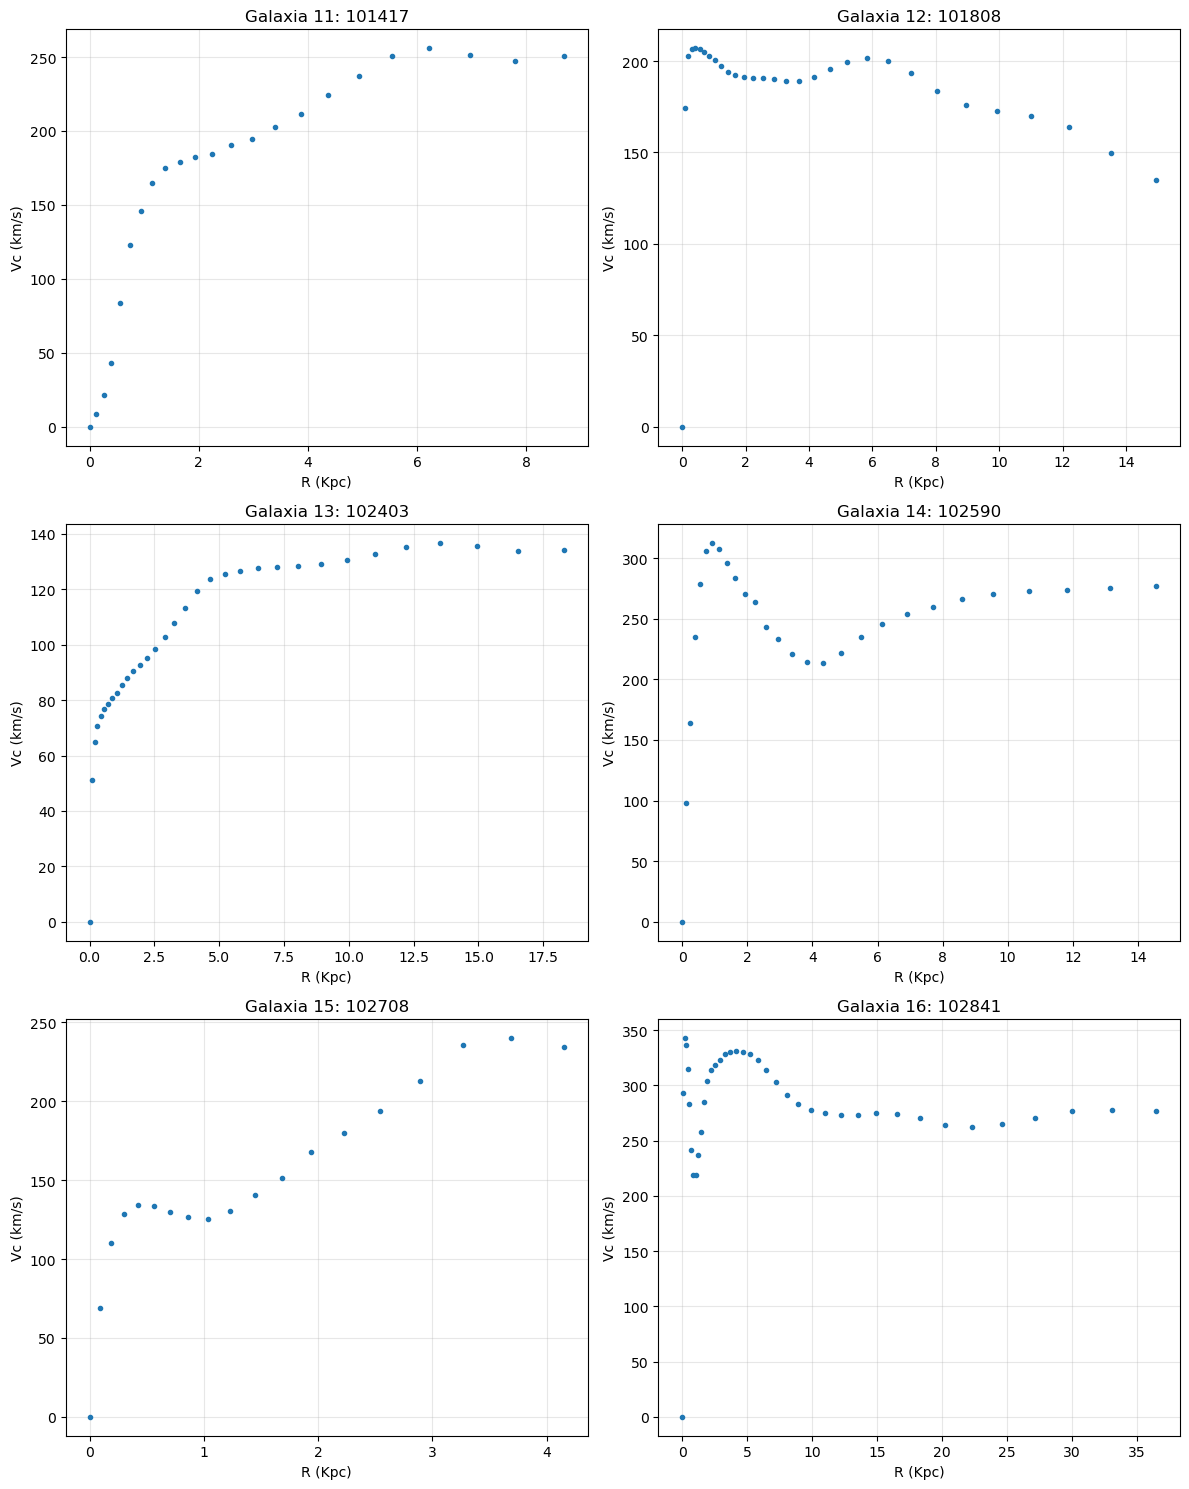

In [3]:
def plot_rotcurve(ax, index):
    ax.plot(Rotcurves[index].R, Rotcurves[index].Vc, '.')
    ax.set_title(f'Galaxia {index}: {Rotcurves[index].name}')
    ax.set_xlabel('R (Kpc)')
    ax.set_ylabel('Vc (km/s)')
    ax.grid(True, alpha=0.3)

fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()  # Convertir a array 1D para facilitar el acceso
for i in range(1, 7):
    j = 10 + i
    plot_rotcurve(axes[i-1], j)
    
plt.tight_layout()
plt.show()

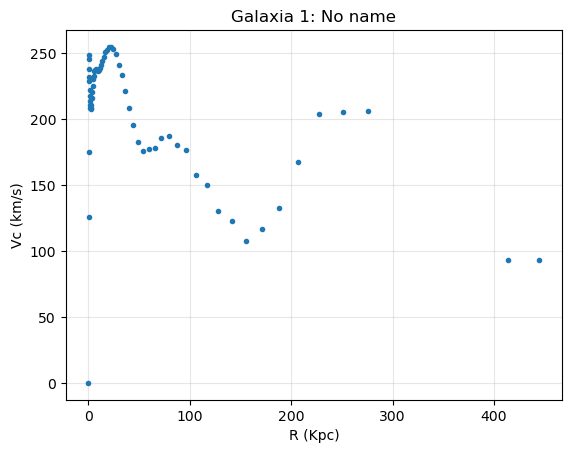

In [4]:
fig, ax = plt.subplots()
plot_rotcurve(ax, 1)

In [5]:
rotcurve_properties_df

,name,max,num_peaks,peaks
1,No name,"(22.32, 254.96)",5,"[(0.42, 248.76), (7.23, 238.09), (22.32, 254.9..."
2,100224,"(12.2, 263.32)",6,"[(0.42, 217.94), (1.94, 250.56), (12.2, 263.32..."
3,100253,"(7.4830999, 217.1999969)",4,"[(0.20362, 201.3999939), (2.73435, 215.8000031..."
4,100342,"(6.49, 198.97)",2,"[(6.49, 198.97), (12.2, 192.84)]"
5,100598,"(14.95, 132.01)",1,"[(4.65, 102.27)]"
...,...,...,...,...
225,611707,"(8.94, 98.44)",2,"[(2.54, 87.44), (4.65, 96.82)]"
226,611861,"(10.55, 163.44)",0,[]
227,611909,"(7.73, 158.73)",0,[]
228,912391,"(12.5, 176.07)",0,[]


In [6]:
# contamos por el número de picos
groups = rotcurve_properties_df.groupby('num_peaks').count()


In [7]:
rotcurve_properties_df.groupby('num_peaks').groups


{0: [17, 26, 54, 65, 68, 70, 71, 73, 76, 80, 140, 141, 142, 143, 144, 145, 147, 148, 150, 151, 153, 154, 156, 157, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 177, 178, 179, 180, 182, 184, 187, 191, 192, 198, 199, 207, 219, 221, 226, 227, 228], 1: [5, 8, 11, 13, 14, 20, 27, 32, 39, 40, 42, 45, 48, 49, 53, 61, 66, 67, 69, 75, 79, 85, 122, 128, 129, 132, 138, 146, 149, 152, 155, 158, 161, 173, 176, 181, 183, 185, 186, 188, 189, 190, 193, 194, 195, 196, 200, 201, 203, 204, 205, 206, 208, 210, 211, 213, 214, 216, 218, 222, 224], 2: [4, 6, 7, 10, 12, 15, 19, 23, 24, 33, 36, 38, 43, 47, 50, 55, 56, 58, 59, 60, 62, 64, 77, 111, 116, 117, 124, 125, 126, 131, 134, 139, 197, 202, 209, 215, 220, 223, 225], 3: [9, 21, 22, 28, 29, 30, 31, 34, 35, 37, 41, 44, 57, 63, 88, 120, 121, 123, 127, 136, 137, 212, 217, 229], 4: [3, 16, 18, 25, 46, 51, 52, 72, 81, 89, 130, 133, 135], 5: [1, 74, 78, 104, 107, 110], 6: [2, 82, 90, 94, 97, 105, 108], 7: [87, 96, 99, 103, 112], 8: [

/tmp/ipykernel_99425/3004401707.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3, 3, figsize=(10, 10))


KeyError: 230

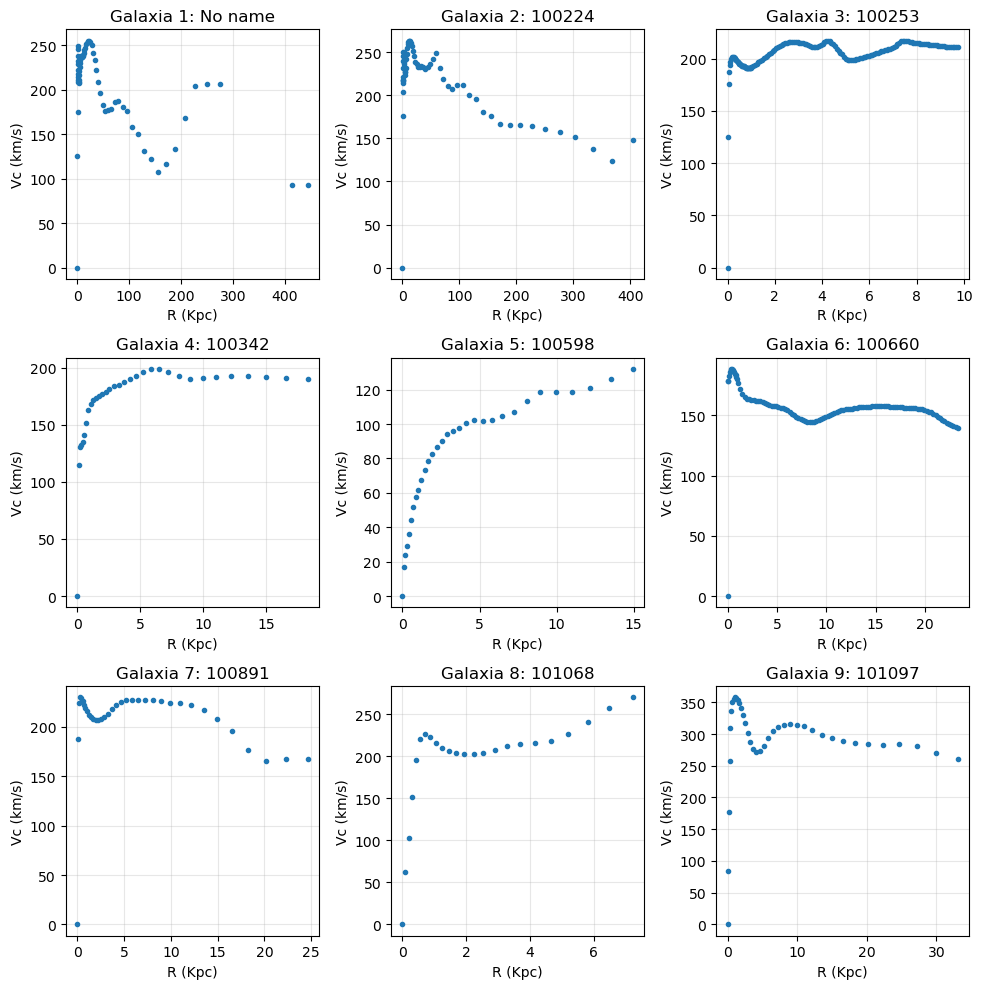

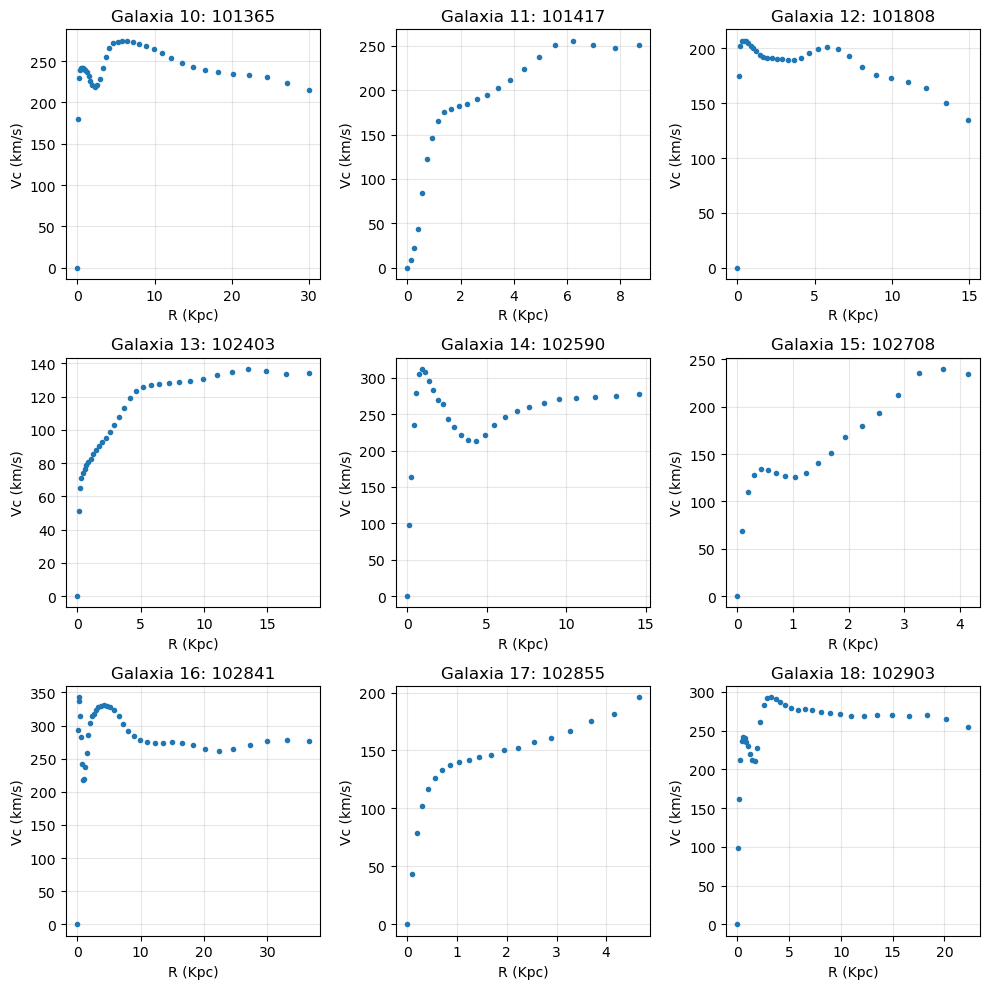

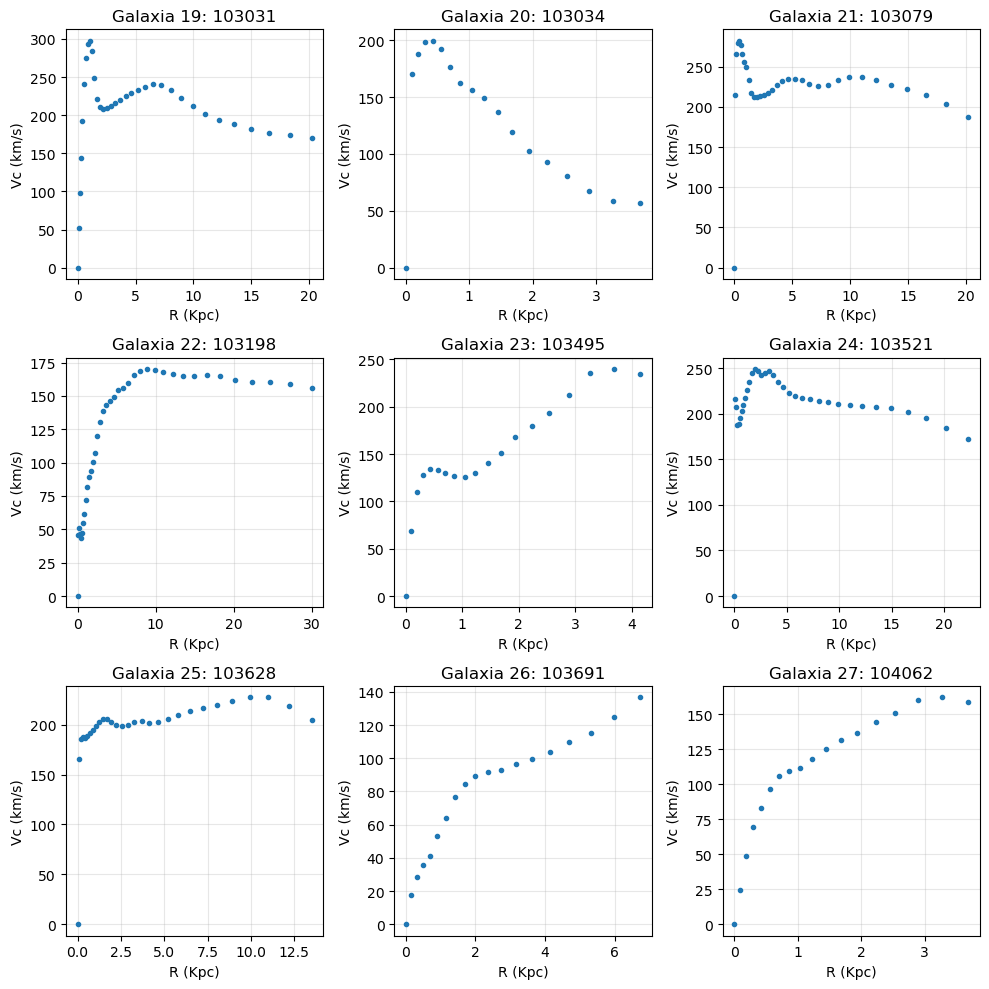

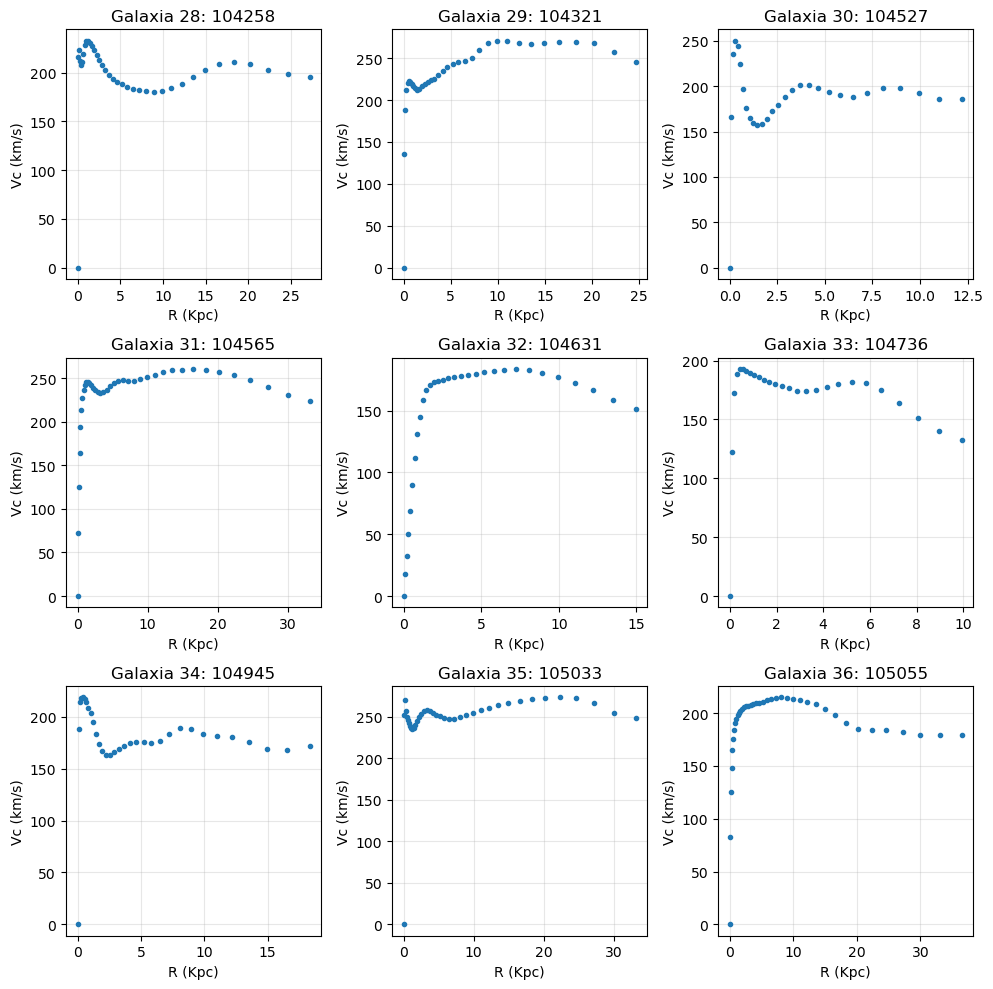

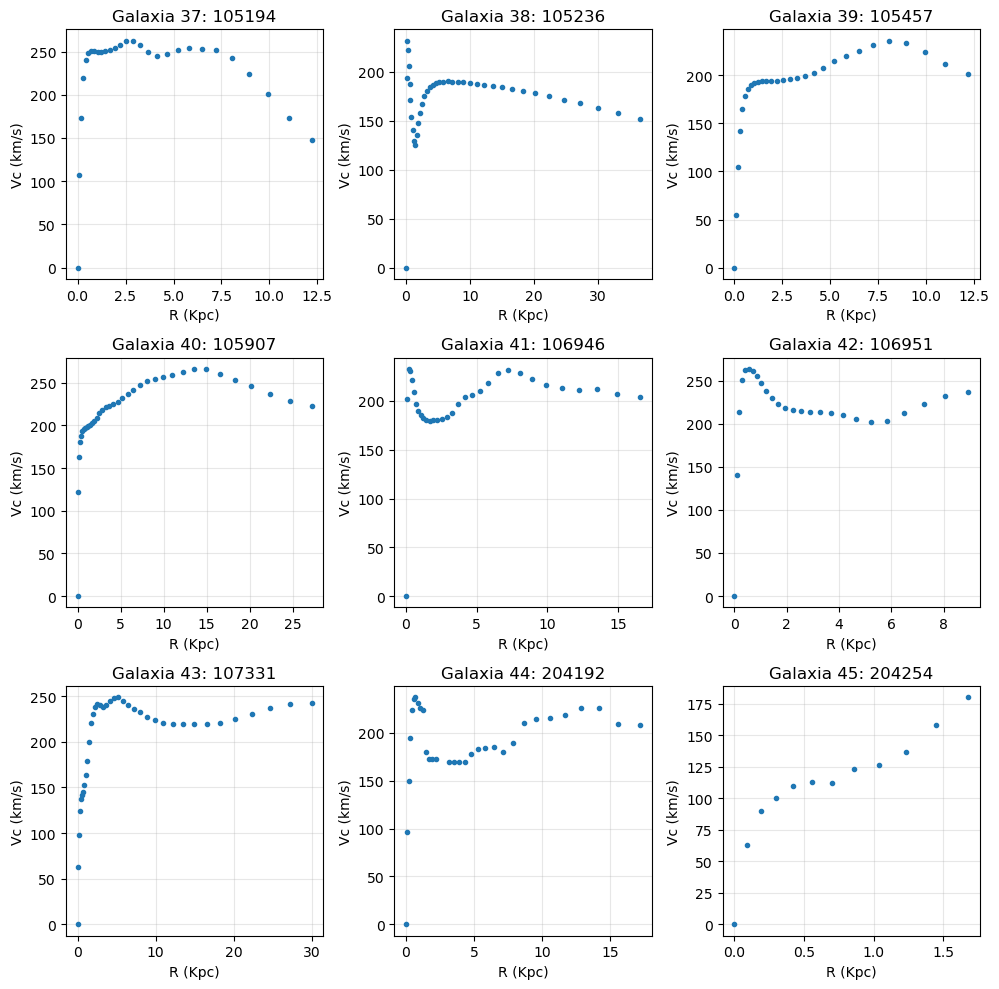

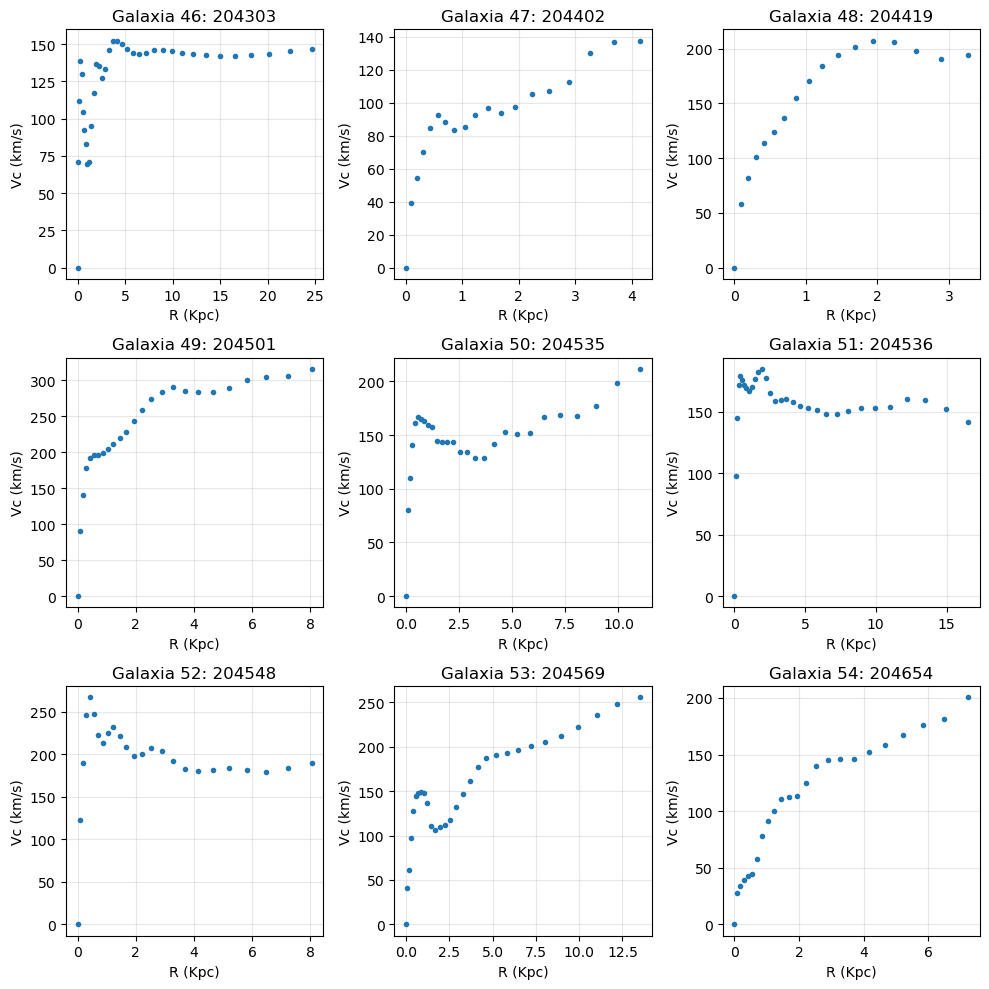

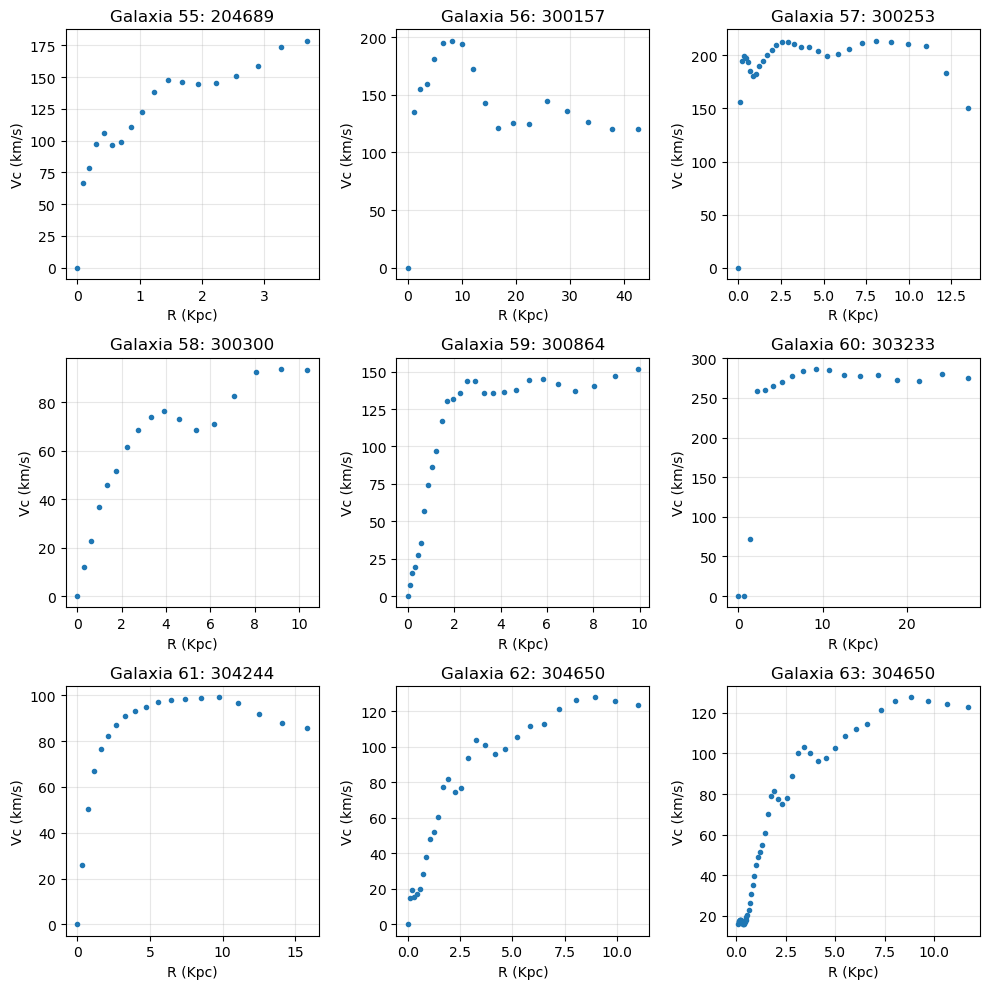

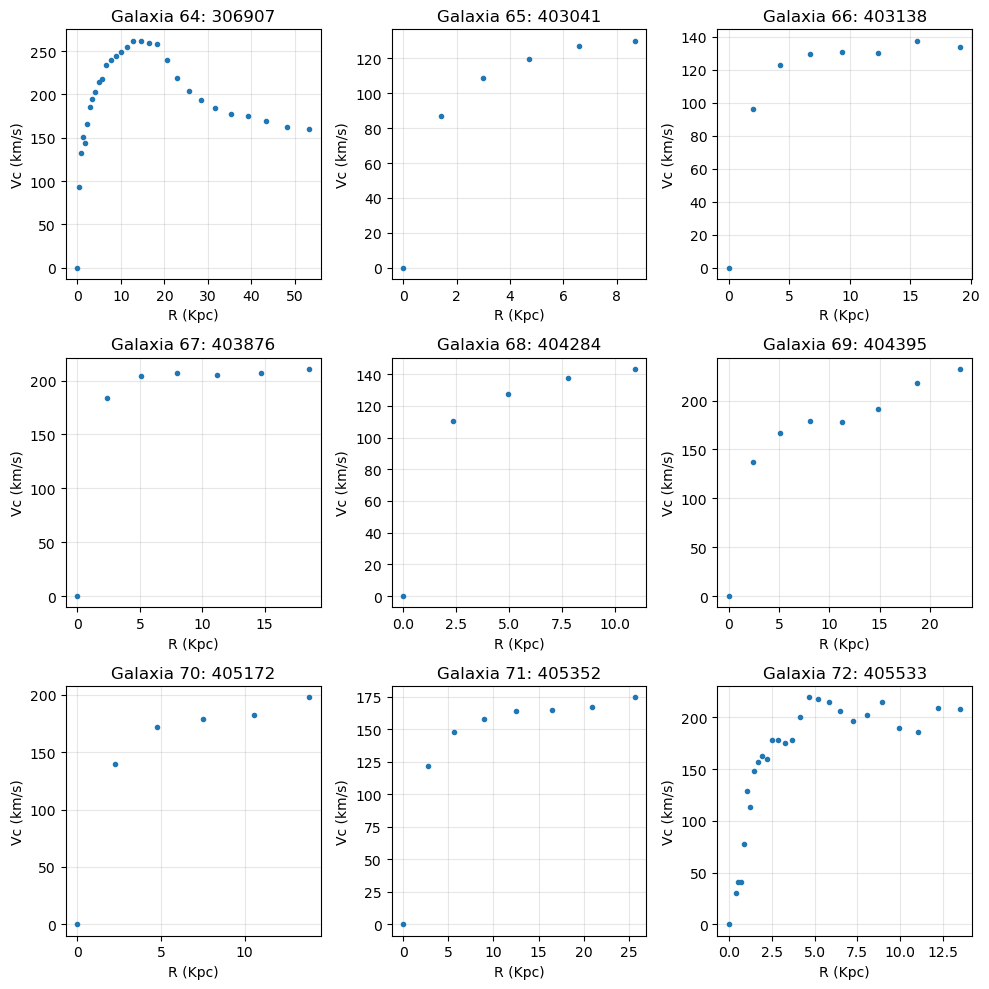

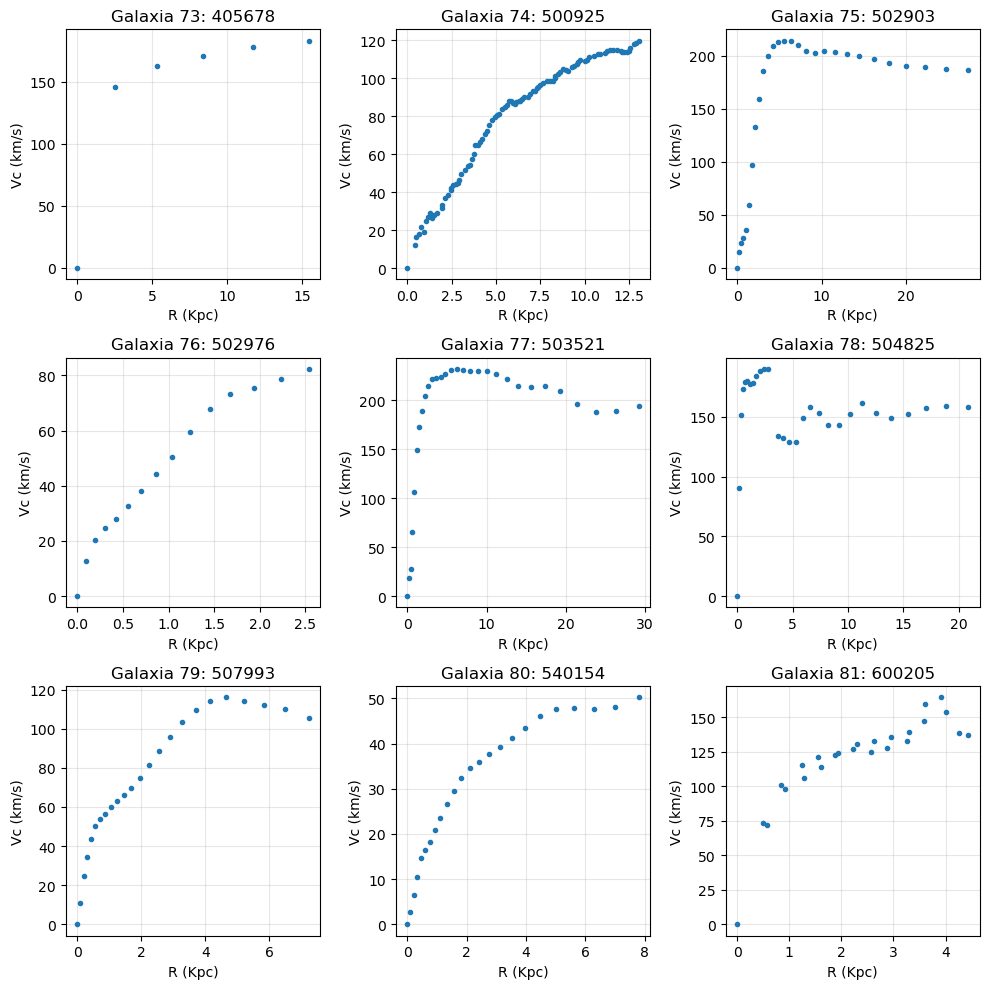

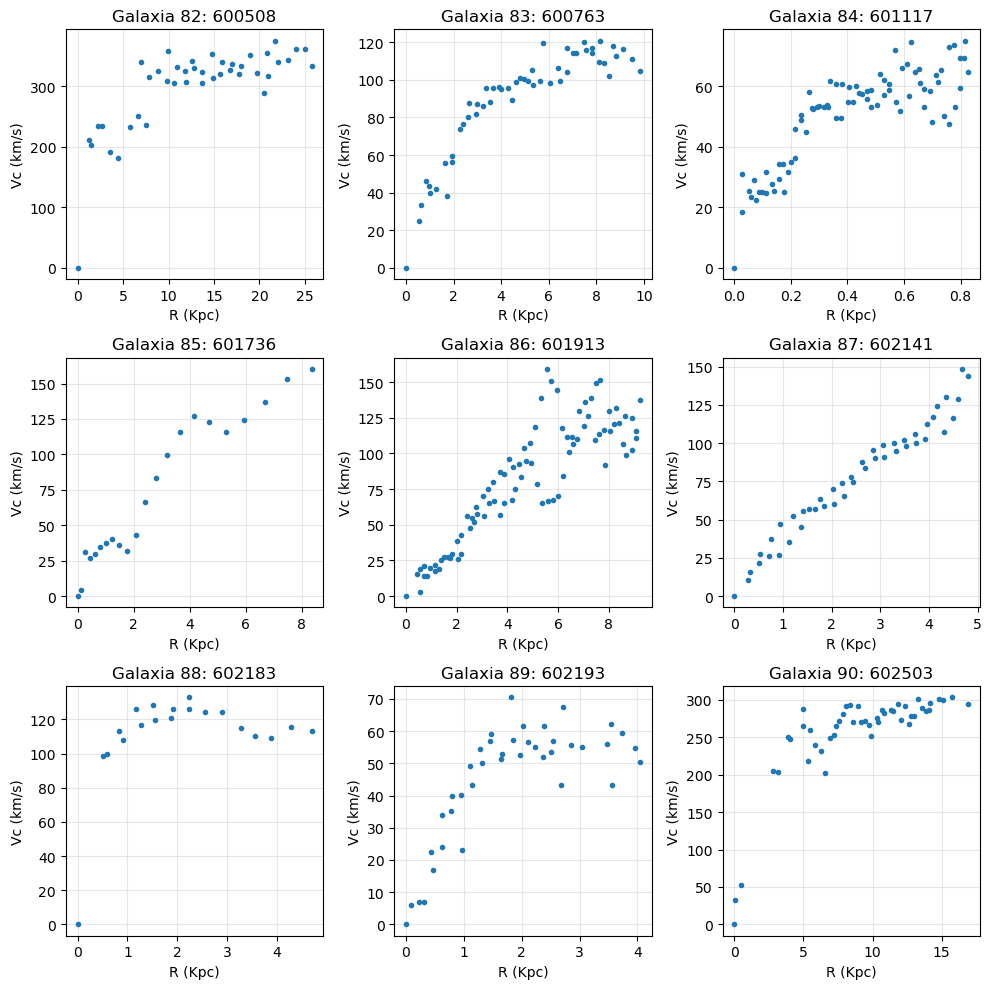

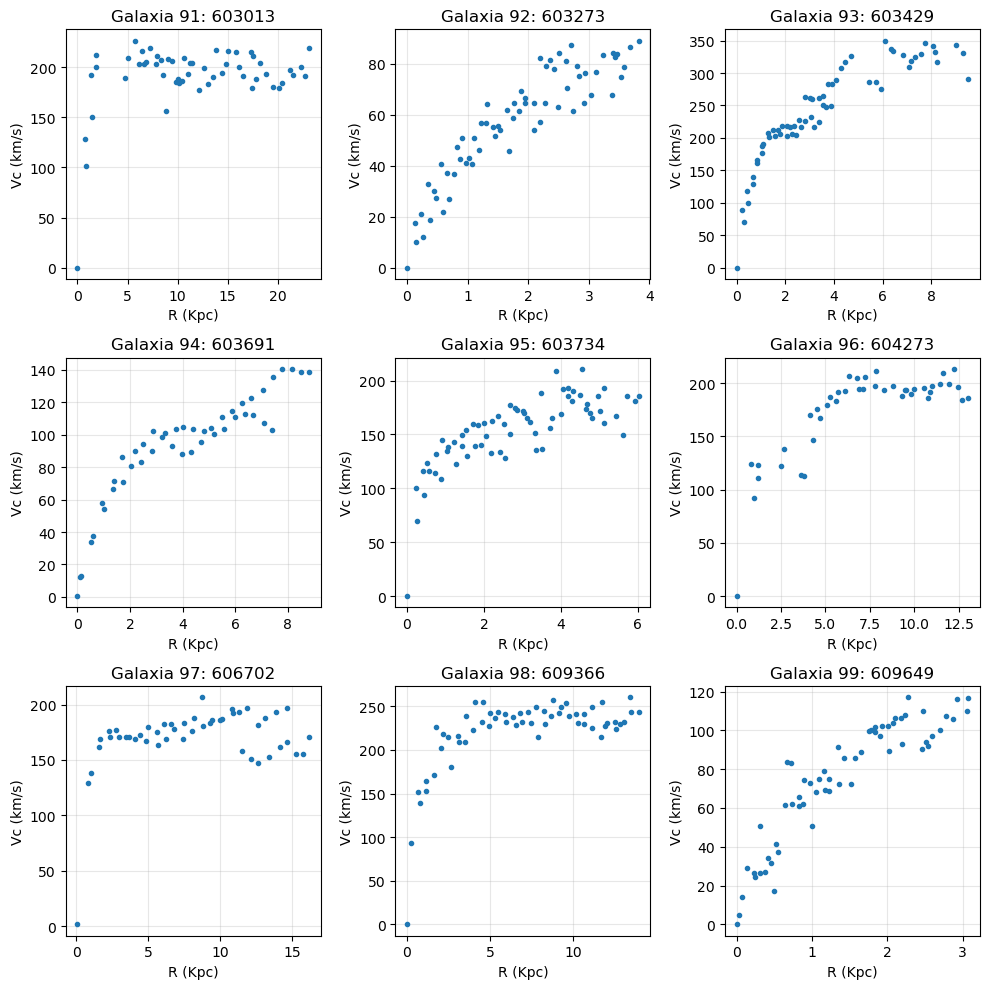

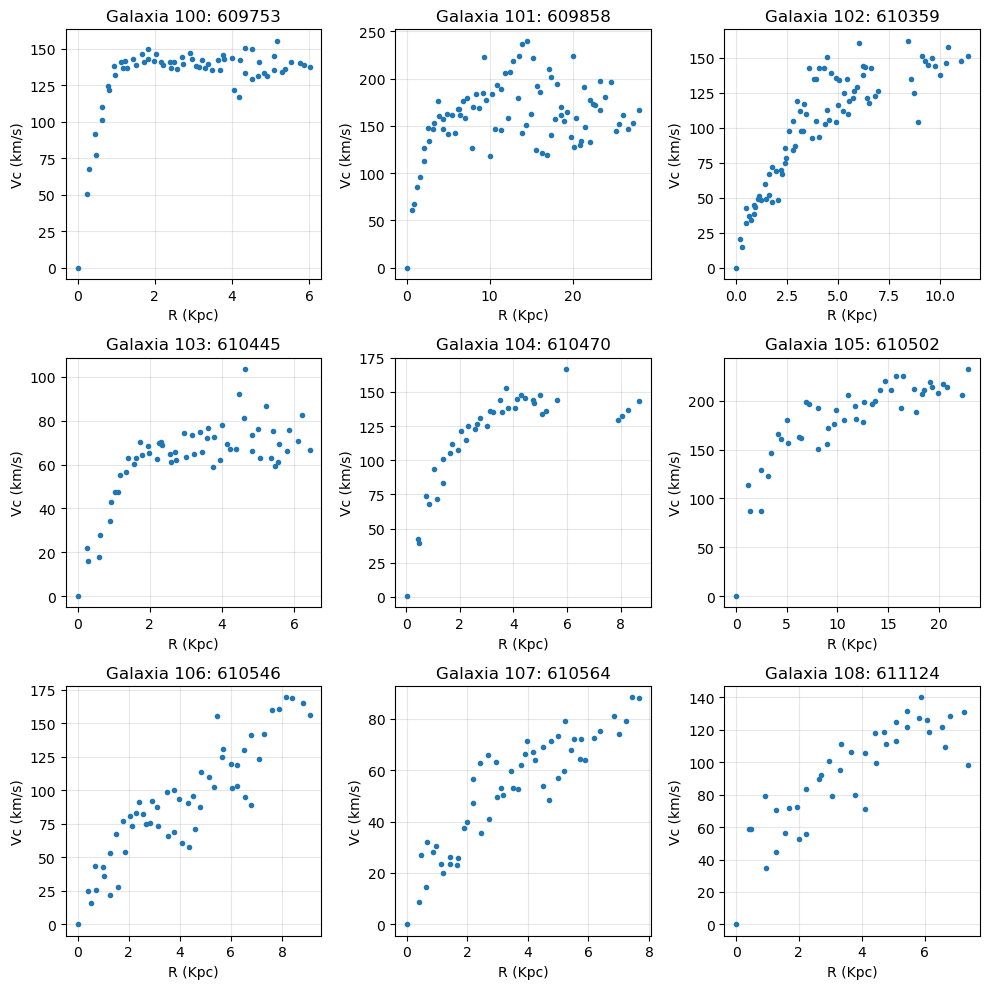

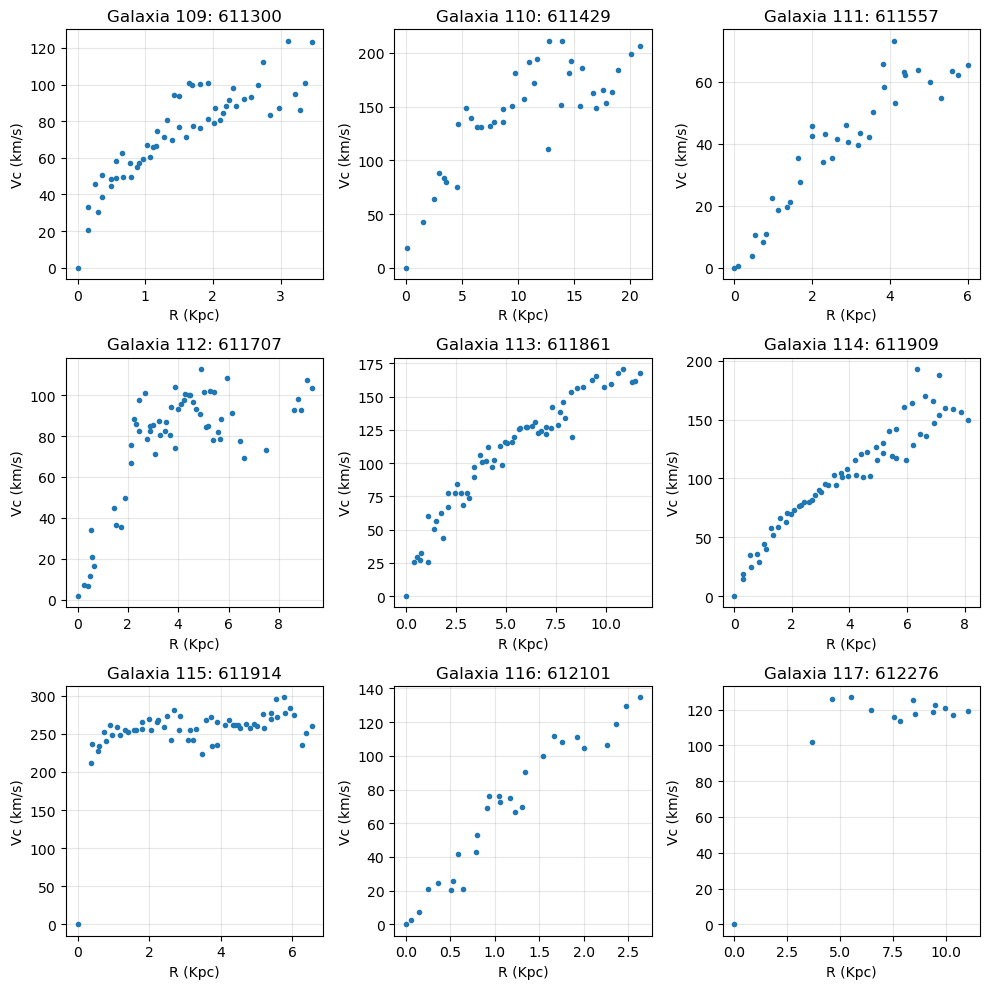

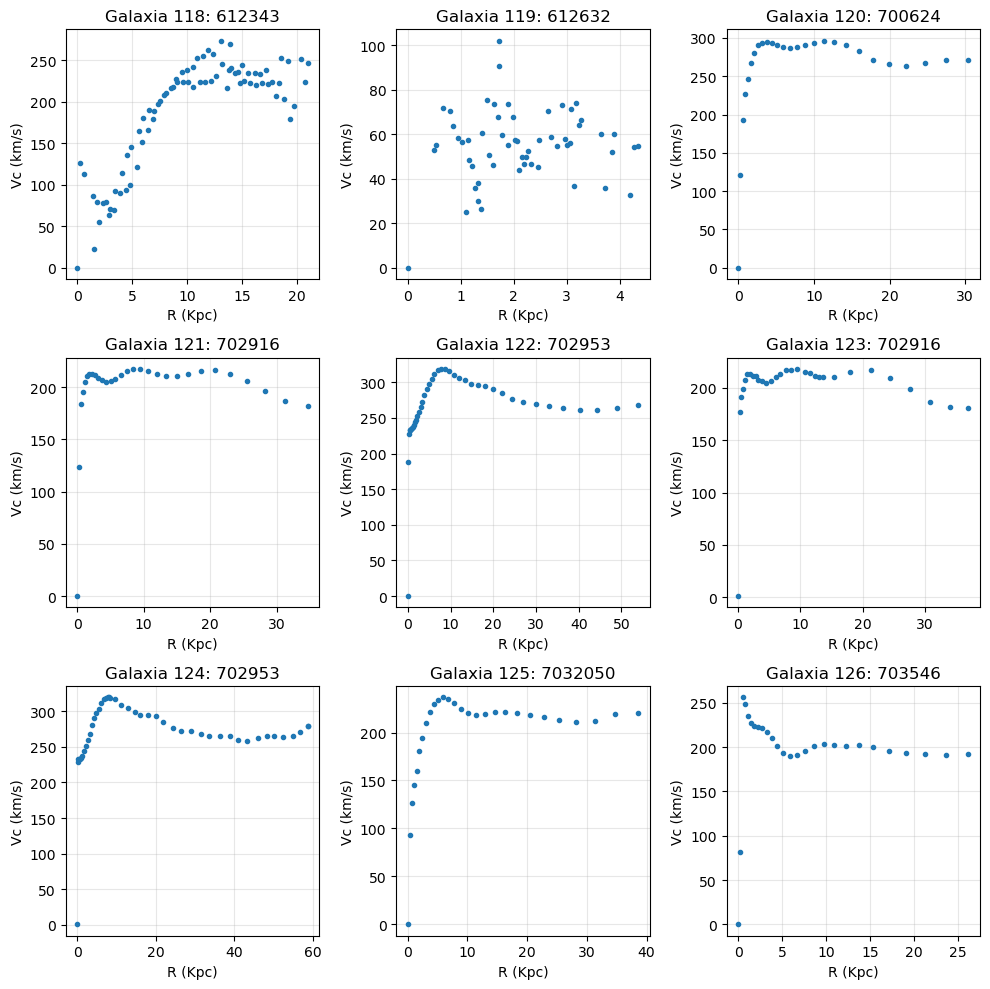

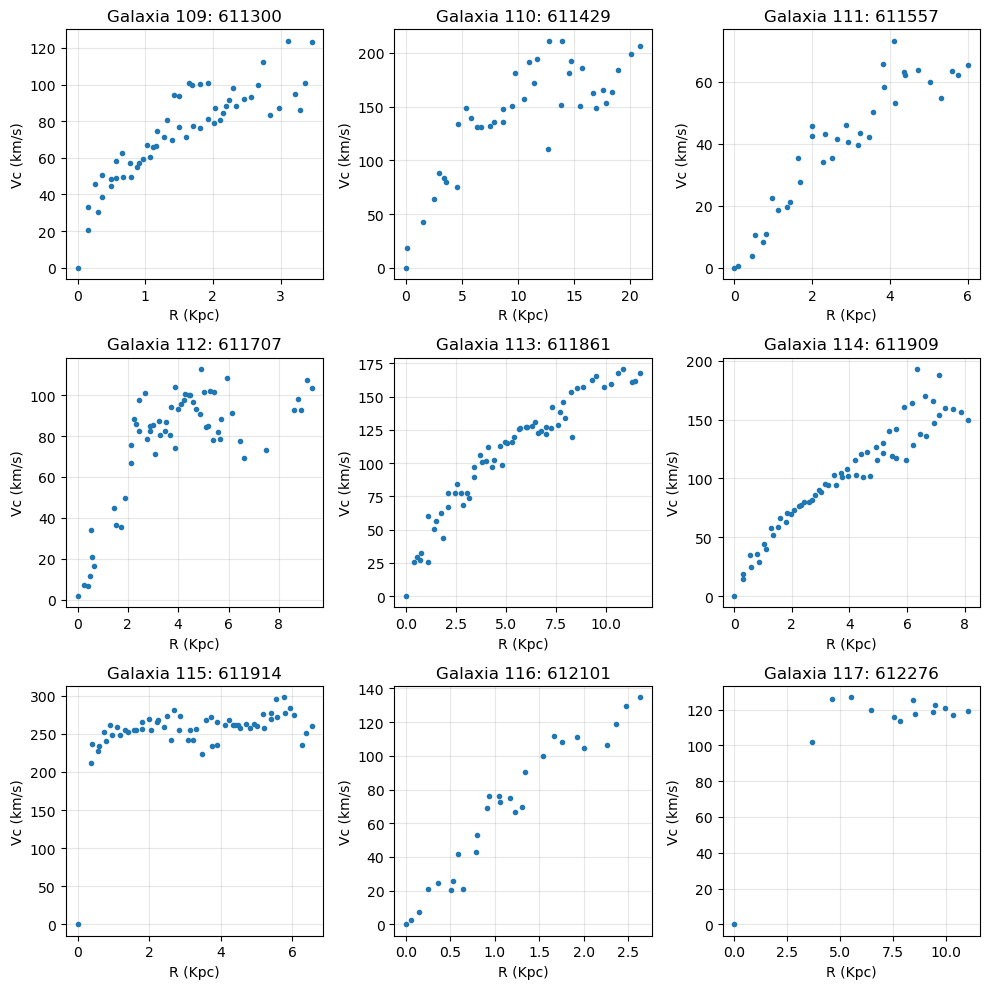

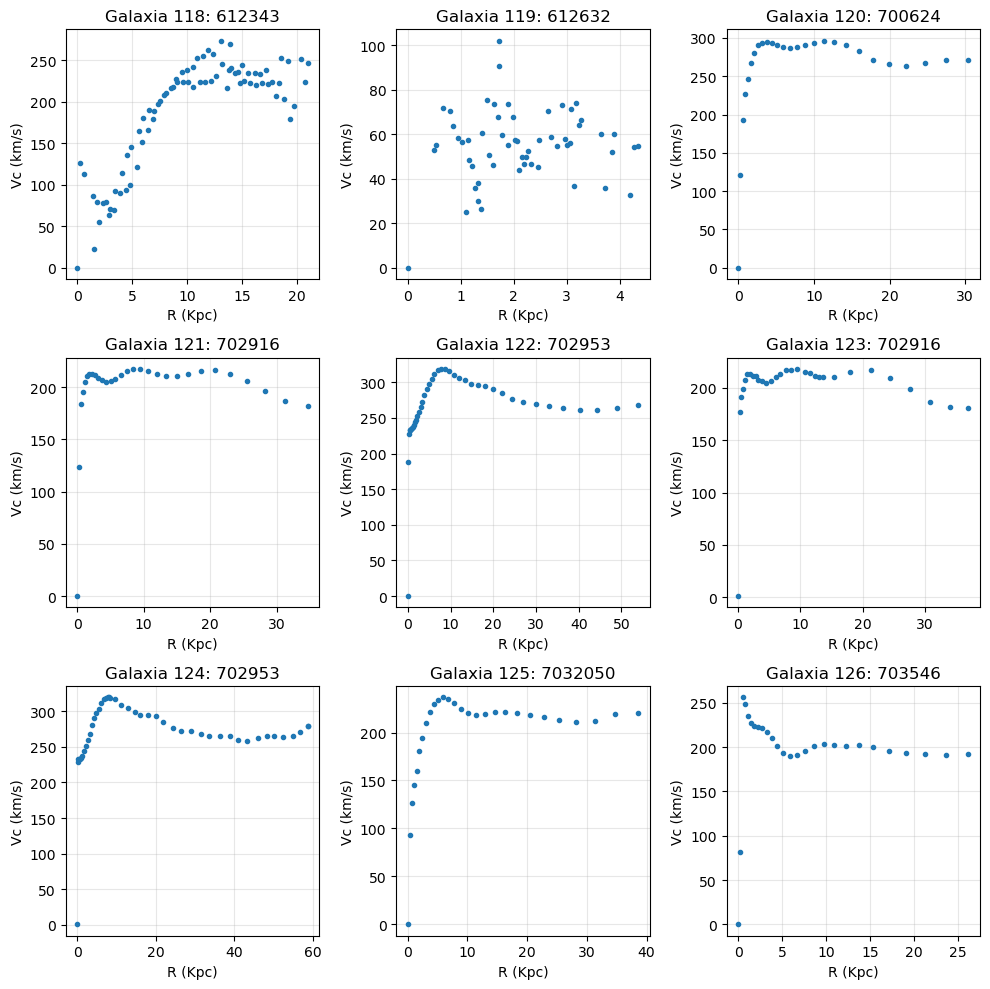

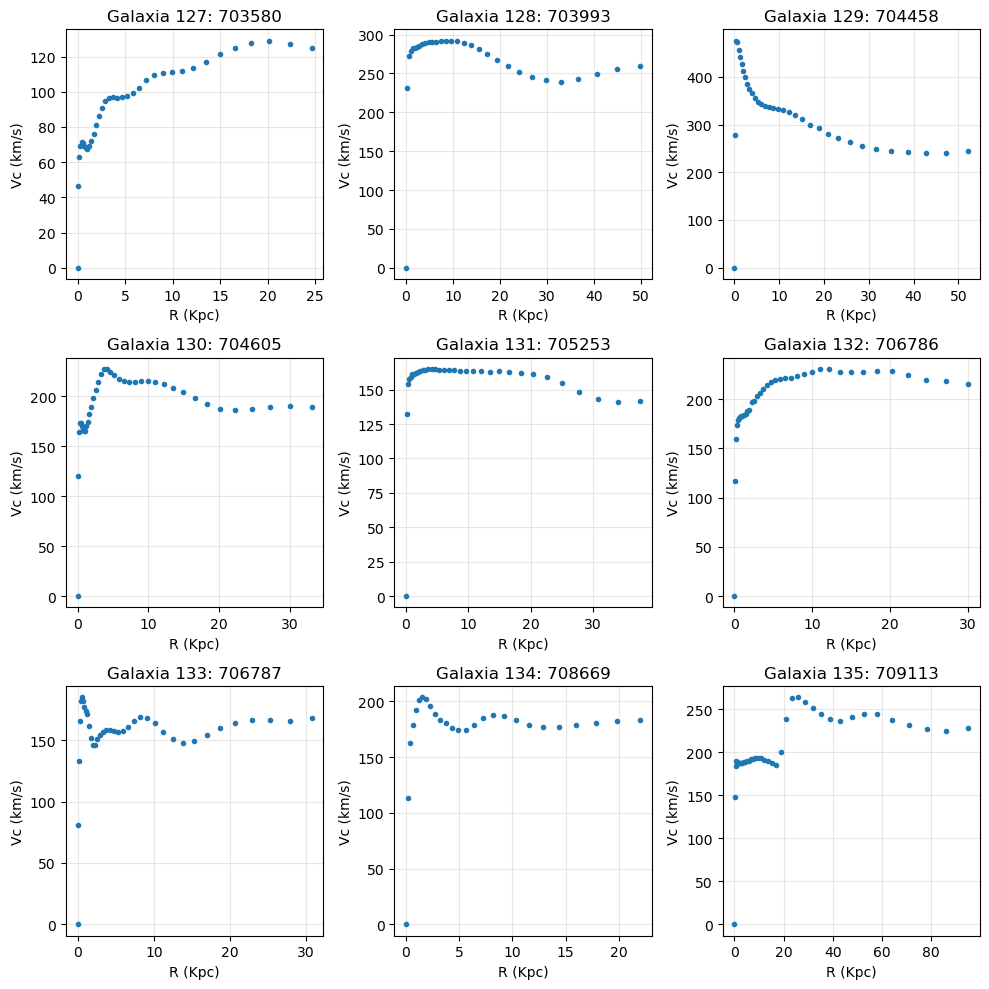

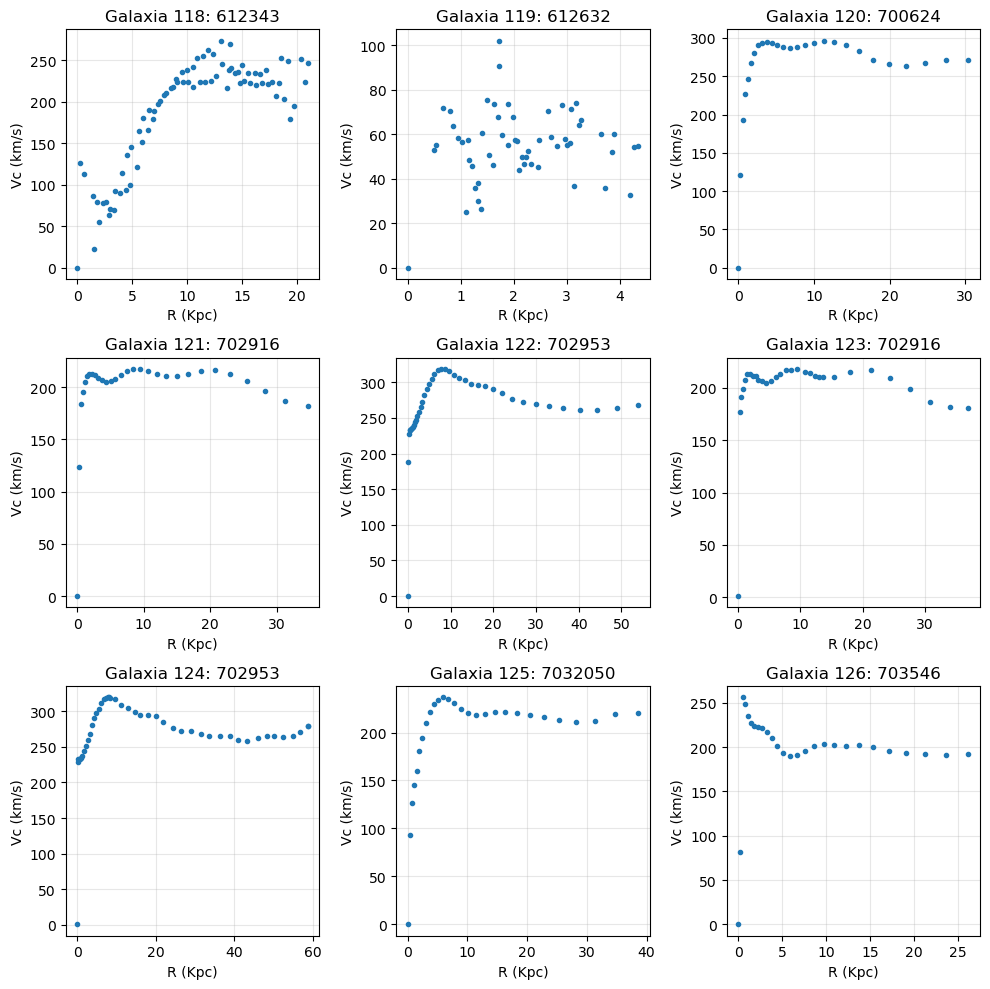

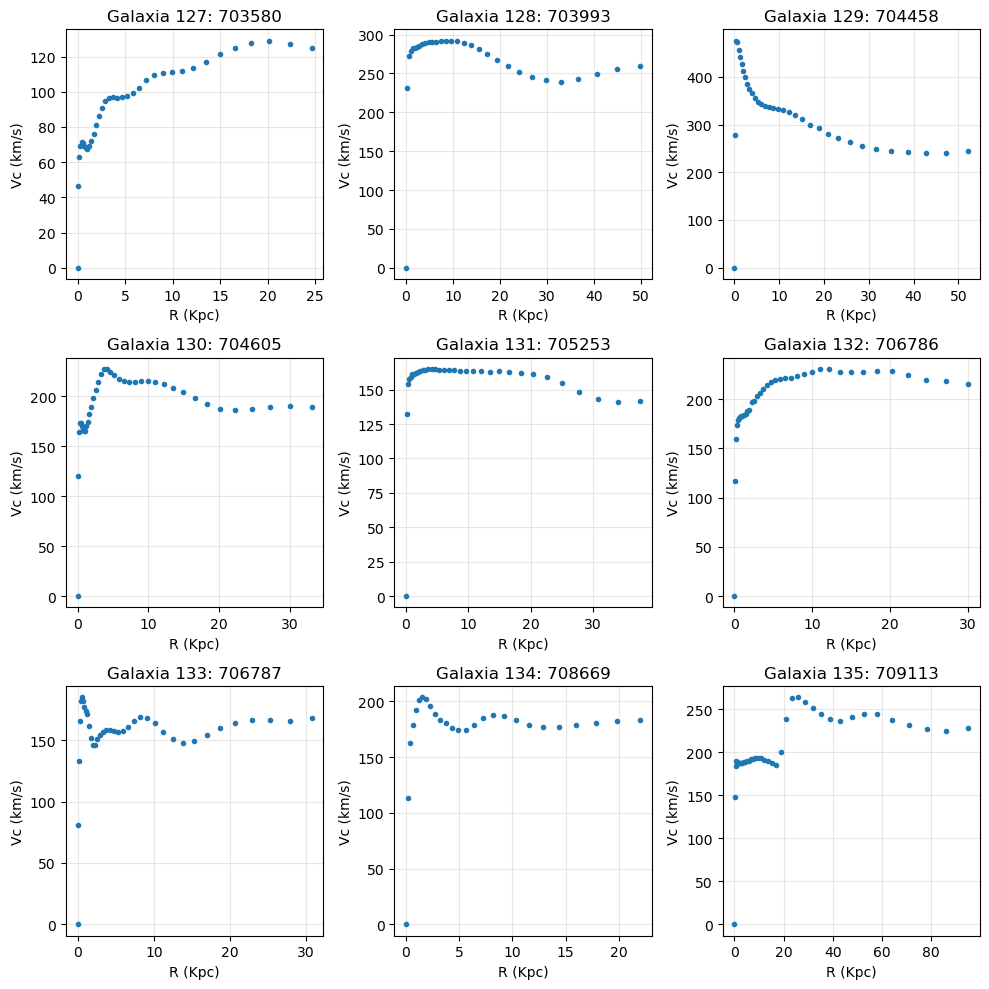

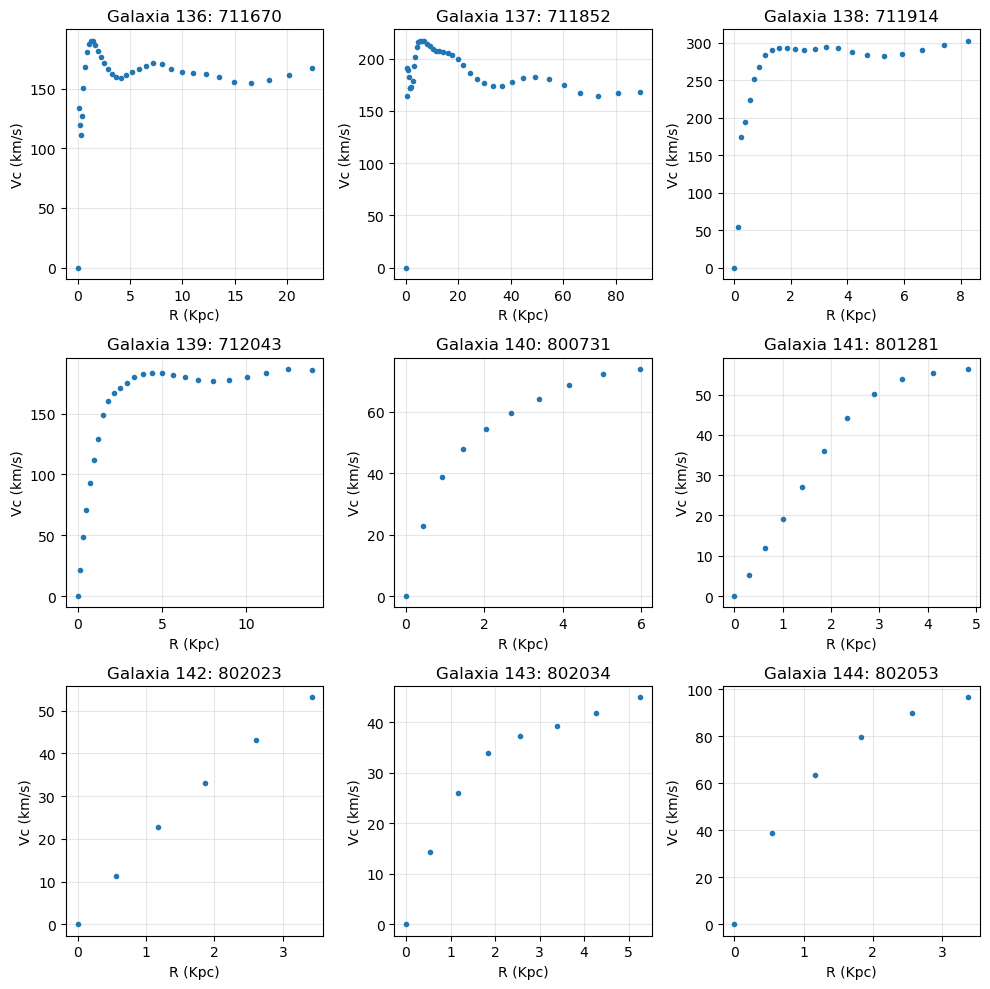

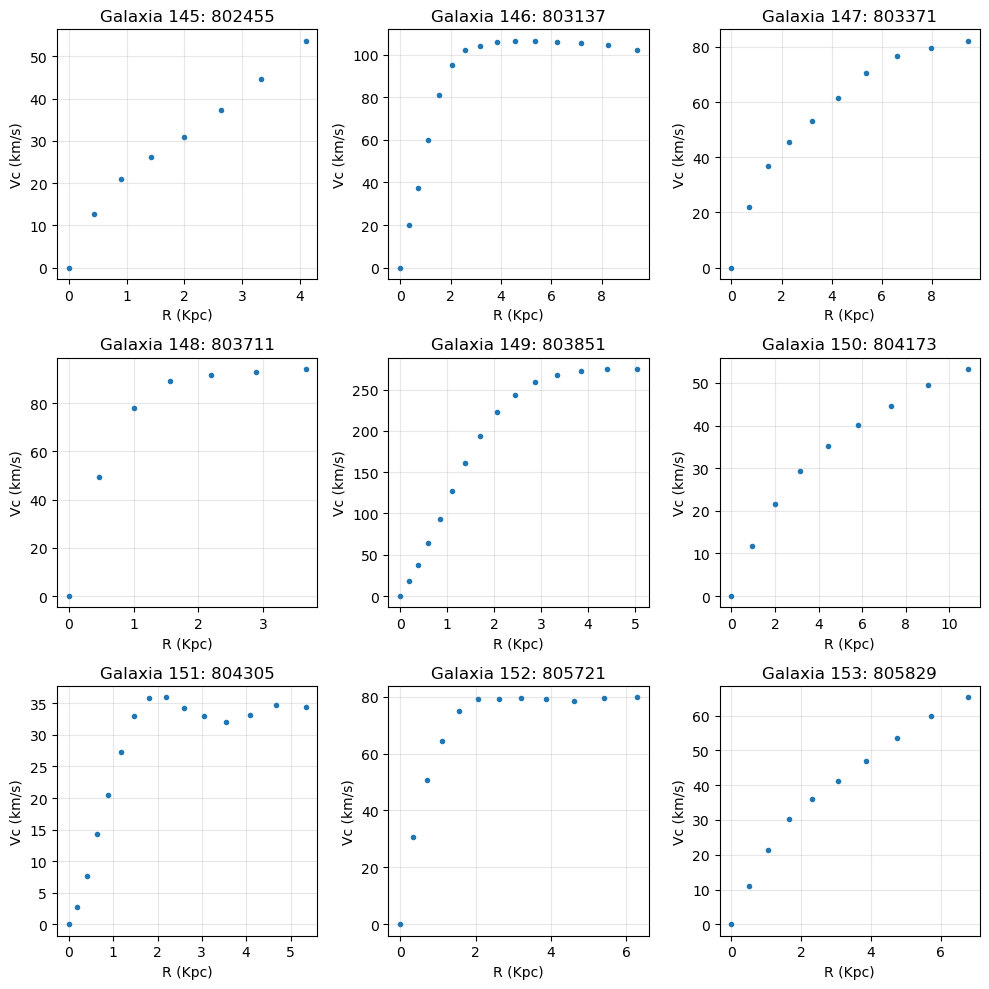

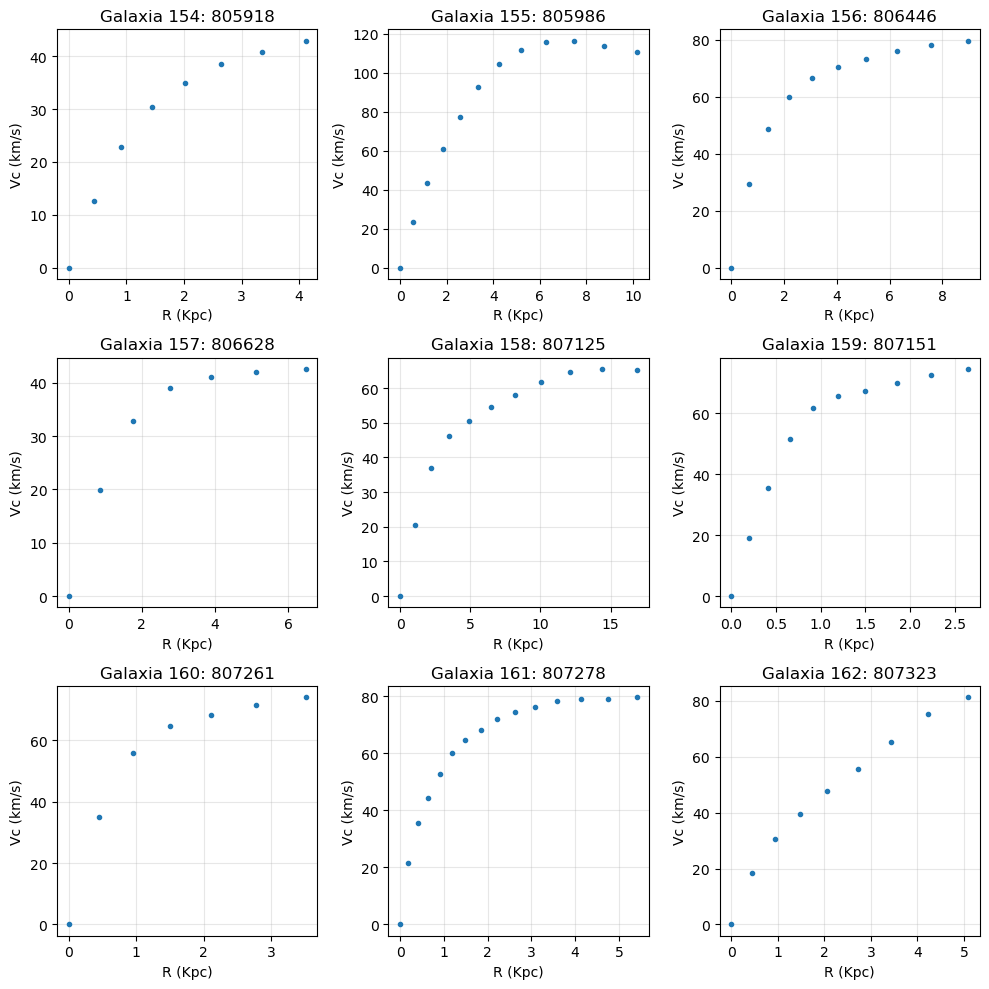

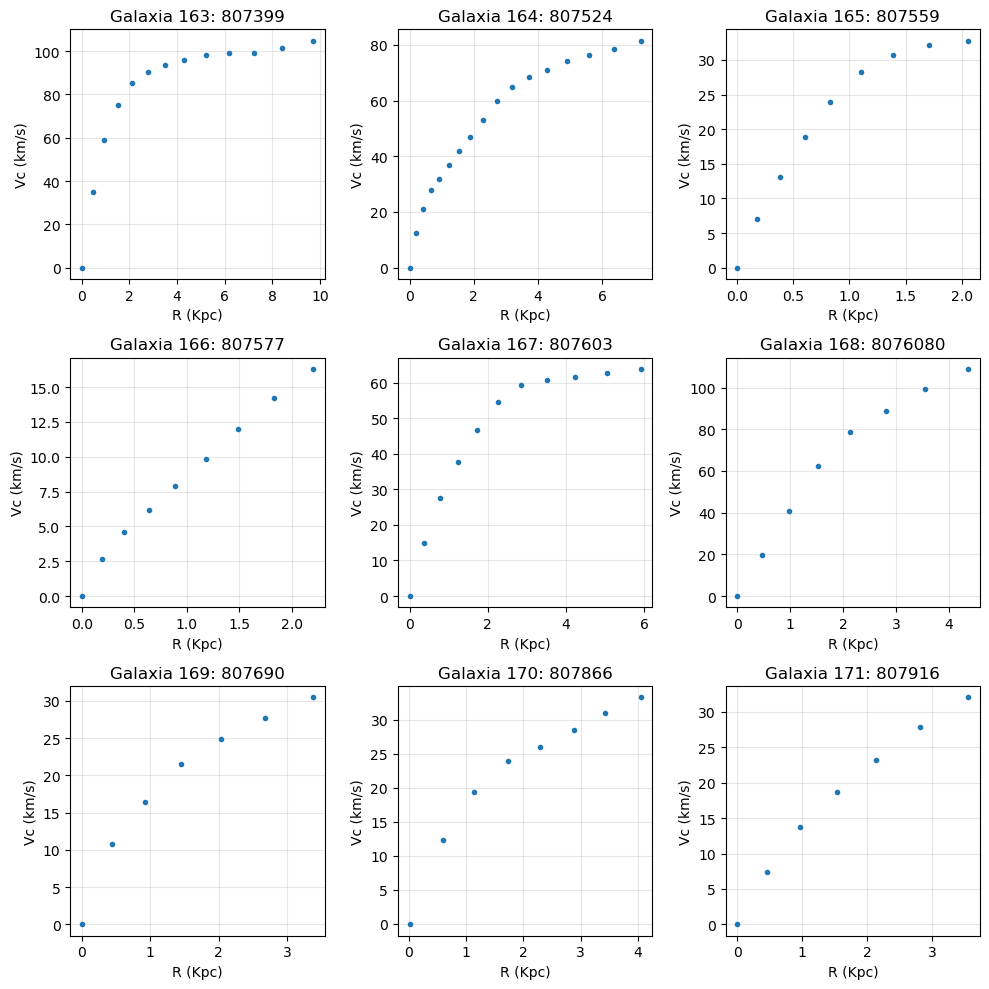

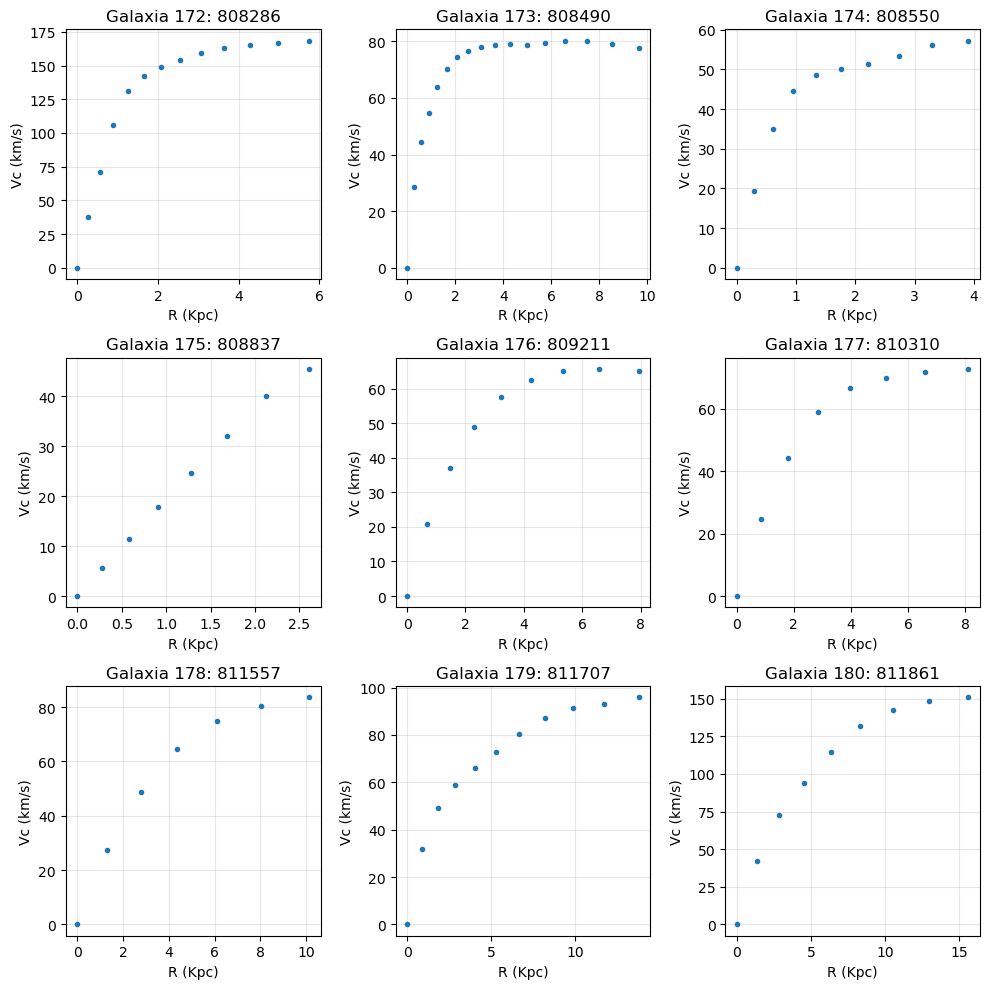

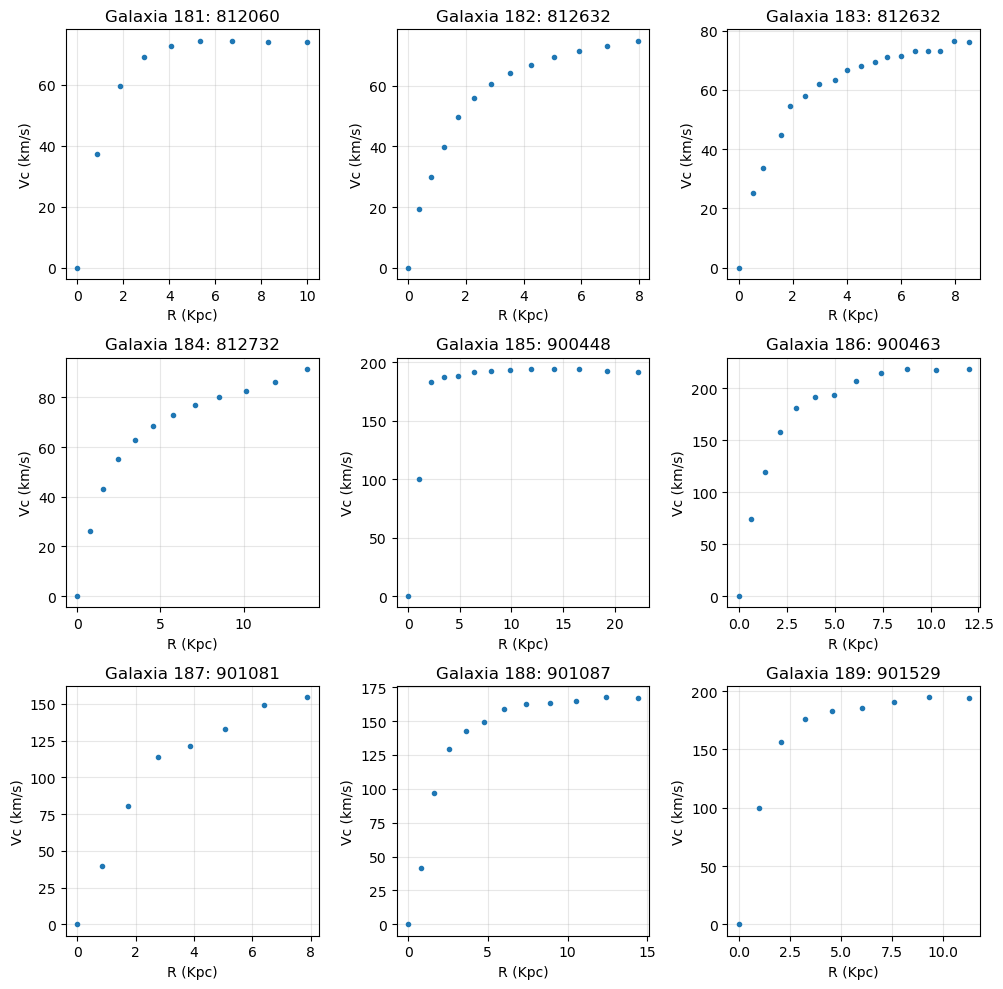

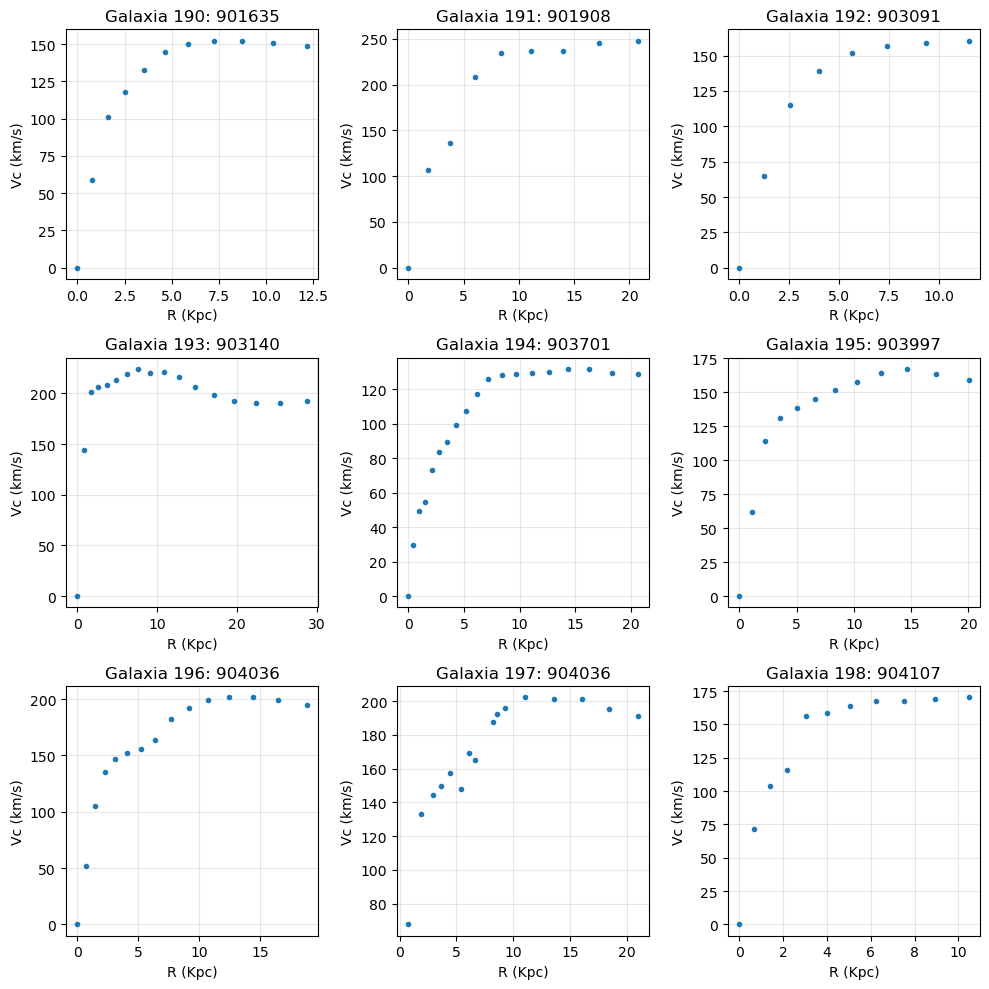

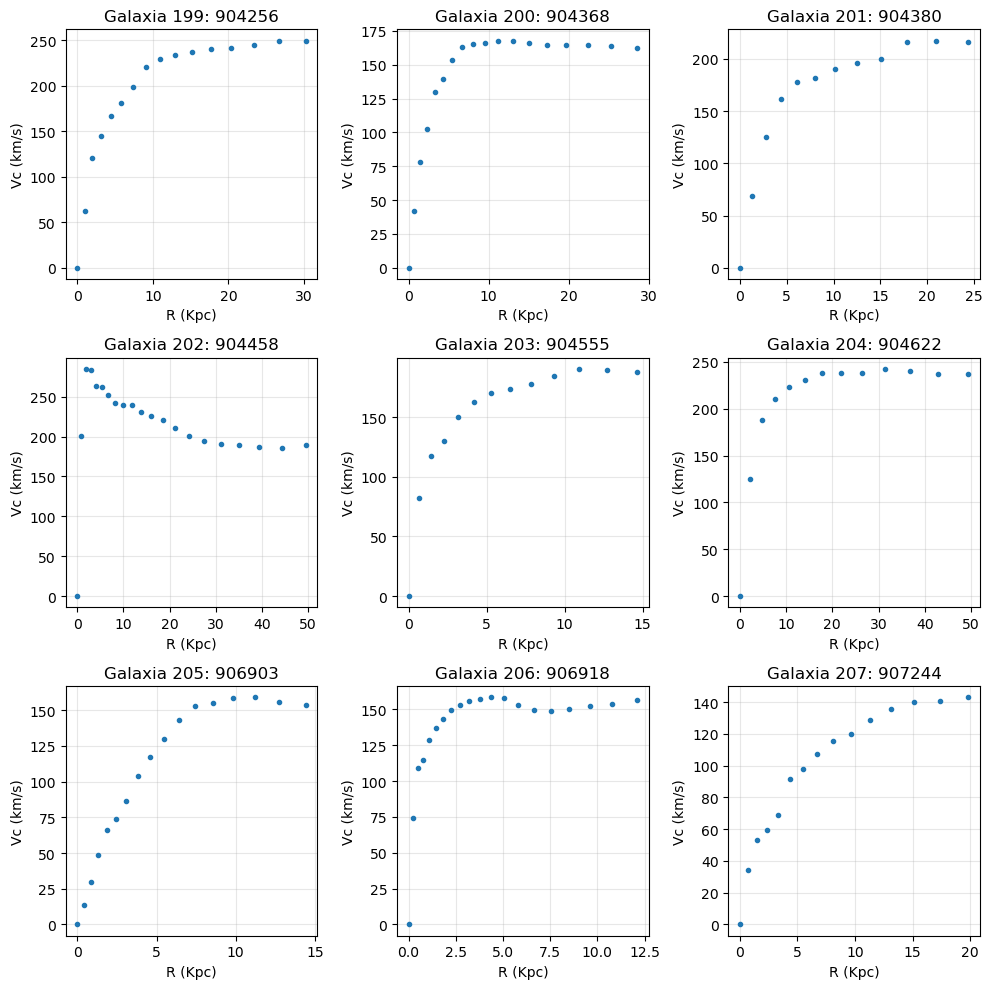

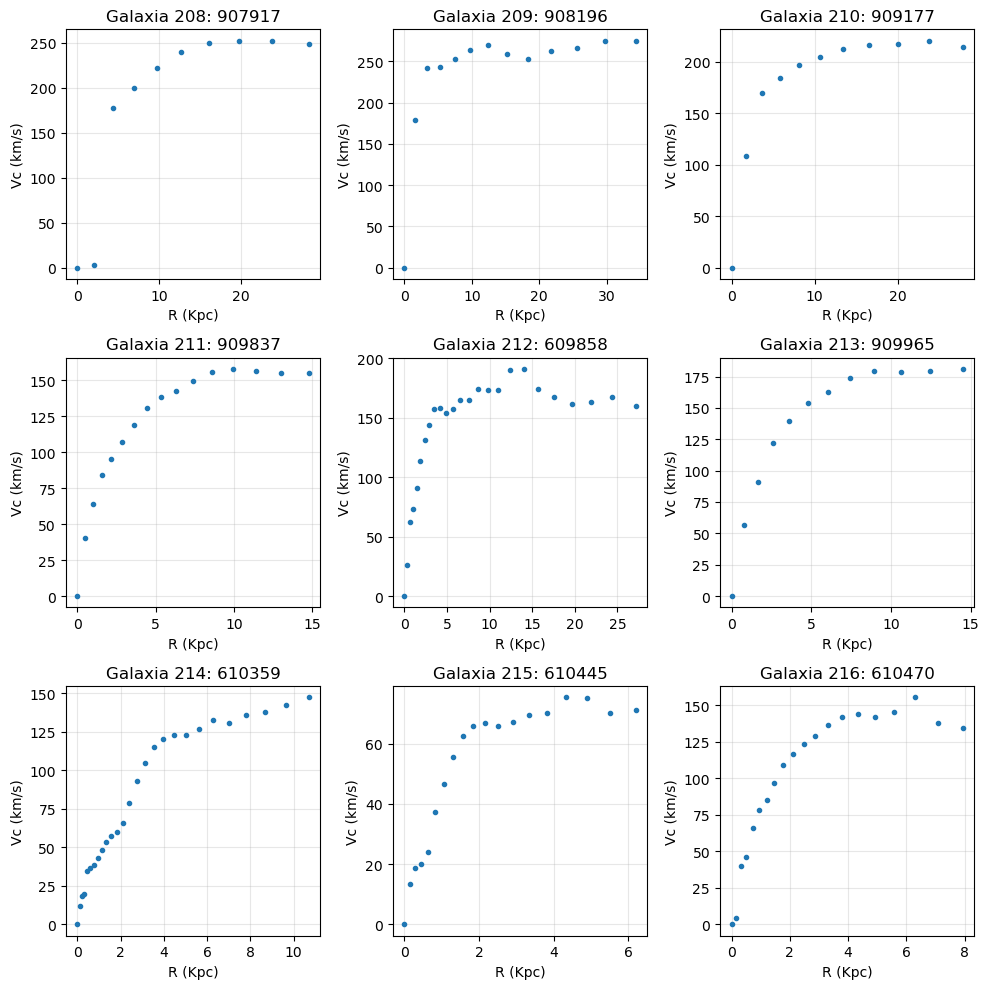

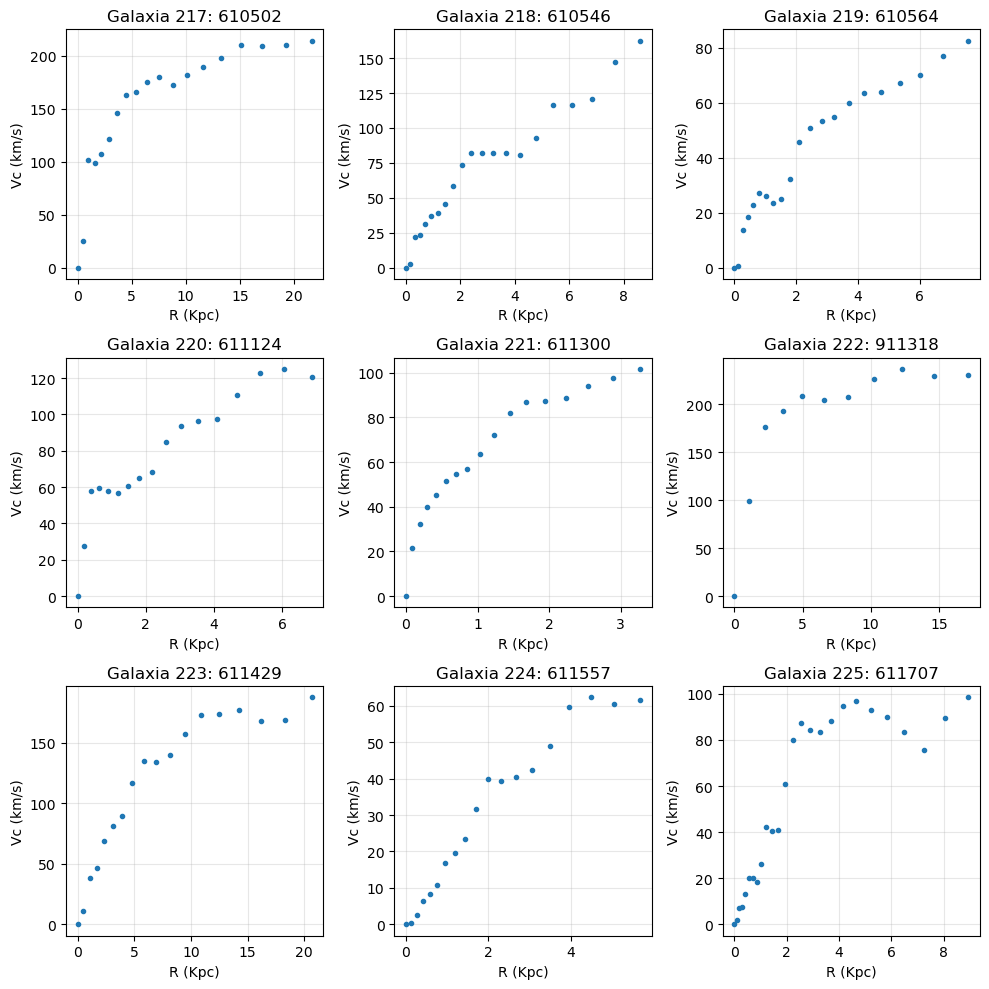

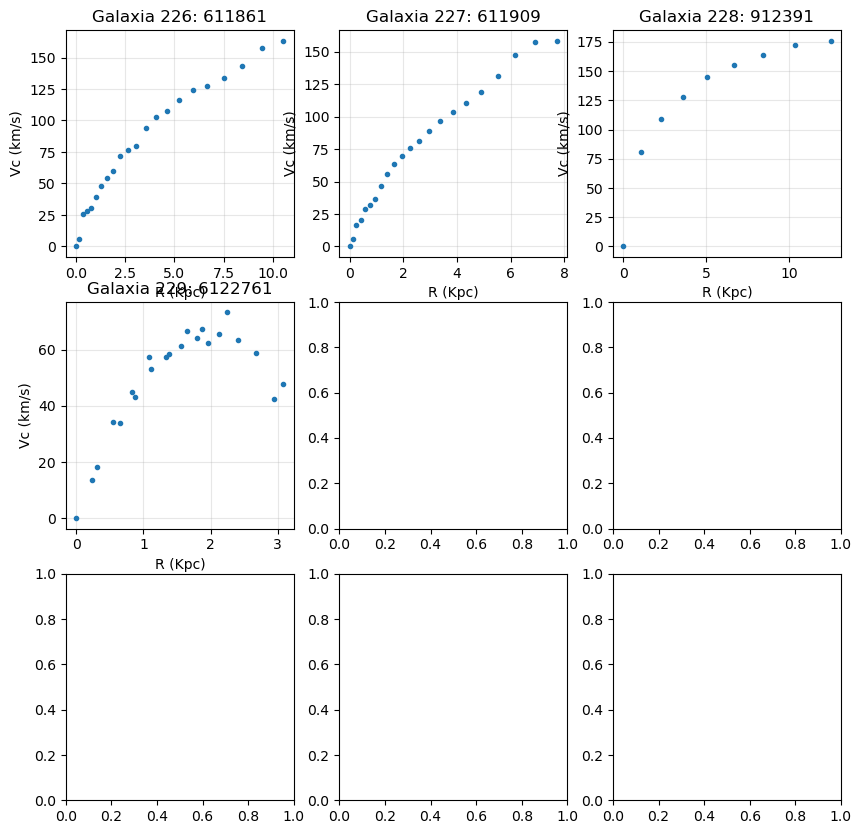

In [13]:
block = 0
while True:
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    axs = axs.flatten()

    start = block * 9 + 1
    end = block * 9 + 10  # end is exclusive

    for idx, i in enumerate(range(start, end)):
        plot_rotcurve(axs[idx], i)

    plt.tight_layout()
    plt.savefig('rotcurves.png')
    user_input = input(f"Bloque {block} (q para salir, - para ir atras): ")
    if user_input == "q":
        break
    elif user_input == "-":
        block = max(block - 1, 1)
    else:
        block += 1

        
